In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv('smoking_driking_dataset_Ver01.csv')

In [4]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [5]:
df['sex'] = (df['sex'] != 'Male').astype('int32') # Сконвертировать столбцы в бинарные значения
df = df.loc[0:1000,df.columns.values[:-1]] # убираем целевой признак из данных и сокращаем число строк

In [6]:
# Центрирование признаков
data = df.values
data = data - data.mean(axis=0)


<AxesSubplot:>

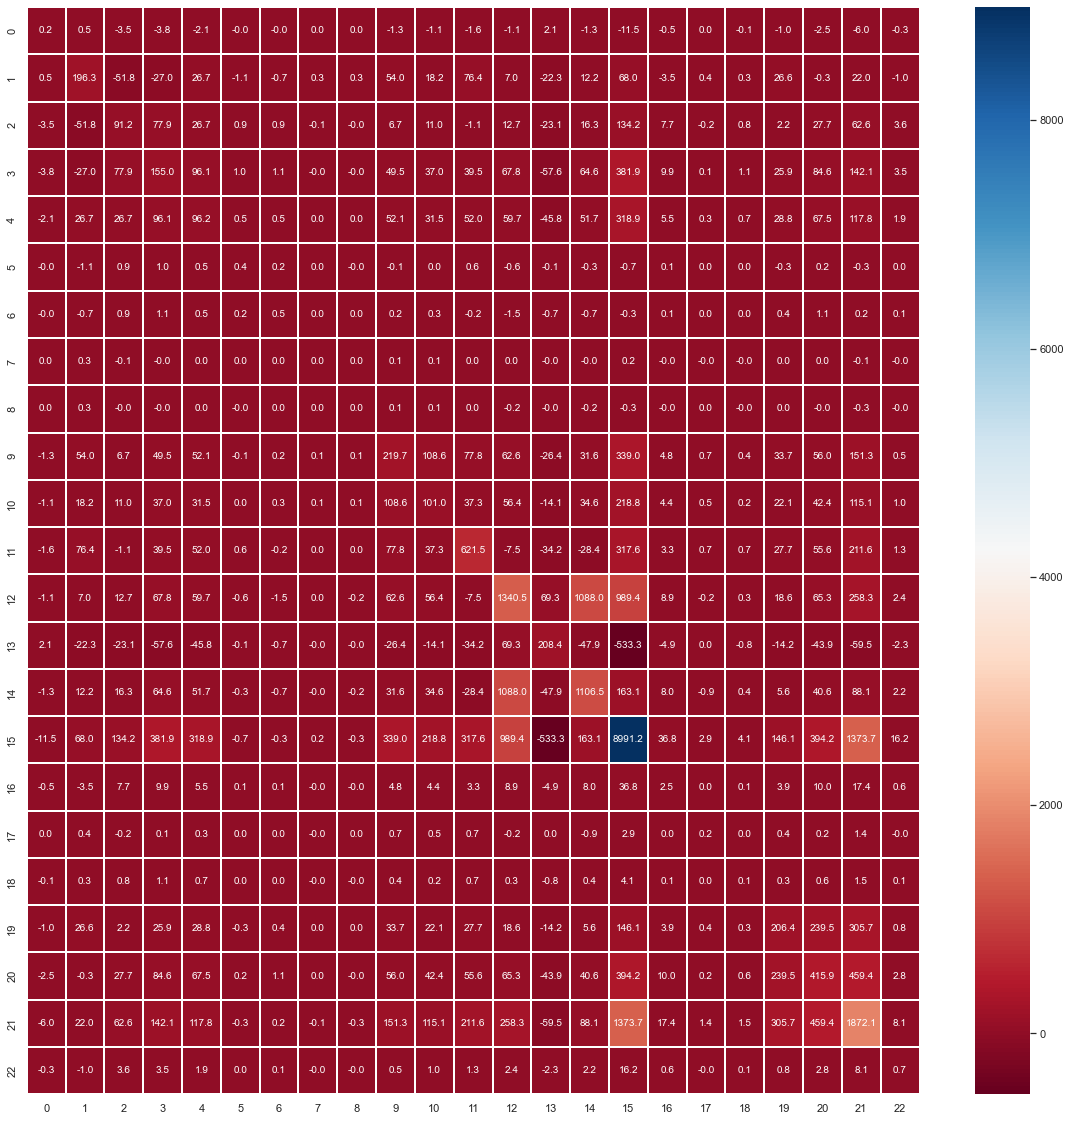

In [26]:
# ковариационная матрица признаков исходного датасета (для дальнейшего анализа)
plt.subplots(figsize=(20, 20))
sns.heatmap(np.cov(data.T), 
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

In [16]:
def SVD(matrix):
    ## здесь будет функция из п.1
    return np.linalg.svd(matrix)

In [17]:
U, s, V = SVD(data)

##### Преимущества и недостатки применения сингулярного и спектрального разложения к задачам PCA
**+**  это более стабильный и точный метод в отличие от обычного собственного разложения ковариационной матрицы, недостатком которого является вычислительная сложность(такая матрица данных будет огромной, содержащей тысячи данных, очень сложно вычислить собственные значения матрицы ковариации, которые иногда могут вызывать такие ошибки, как ошибки округления).
(https://digitrain.ru/articles/240387/)




#### Выбор числа главных компонент
Произведем выбор числа главных компонент по правилу Кайзера: значимы те главные компоненты, для которых собственное значение превосходит среднюю выборочную дисперсию координат вектора данных.

In [18]:
PC_num = np.argmax(s <= np.mean(s)) + 1
PC_num

9

Визуализируем долю объясненной дисперсии

In [19]:
import matplotlib.pyplot as plt 
%matplotlib inline 

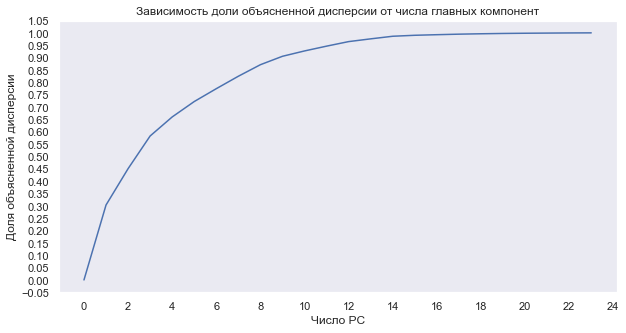

In [20]:
plt.figure(figsize=(10, 5)) 
plt.title('Зависимость доли объясненной дисперсии от числа главных компонент') 
plt.xlabel('Число PC') 
plt.ylabel('Доля объясненной дисперсии') 
plt.grid() 

plt.plot([0] + list(np.cumsum(s)/sum(s))) 
plt.locator_params (axis='y', nbins= 22 )
plt.locator_params (axis='x', nbins= 24 )
plt.show()

In [21]:
cumsum_var = np.cumsum(s)/sum(s)
round(cumsum_var[PC_num],2)

0.93

Таким образом, 9 главных компонент покрывают 93% объясненной дисперсии.

In [22]:
# Составили матрицу Сигма
Sigma = np.zeros_like(covmat, dtype = float)
Sigma[np.diag_indices(min(data.shape))]= s

In [23]:
data_PC = np.dot(U[:, :PC_num], Sigma[:PC_num, :PC_num])
data_PC

array([[ 36.40663719,  15.67797346, -11.51464419, ..., -13.34778818,
          4.79544456,   0.90872481],
       [  4.78304164,  48.62090765,  11.54623737, ..., -13.92315038,
         21.24086006,   3.1939431 ],
       [ 28.4229306 , -55.86809175, -54.09396298, ..., -10.08995889,
         -7.44489391,  -3.41570462],
       ...,
       [-94.21653151,  -1.21993125, -16.73821377, ...,   1.55332419,
          8.51140258,  -3.23967026],
       [ 28.49303395,  94.08844689,  32.6254664 , ..., -14.80770238,
        -22.30575764,  -1.95789843],
       [  8.05398445, -17.96194888,  23.59185368, ..., -14.54967908,
        -15.71510795, -12.891271  ]])

<AxesSubplot:>

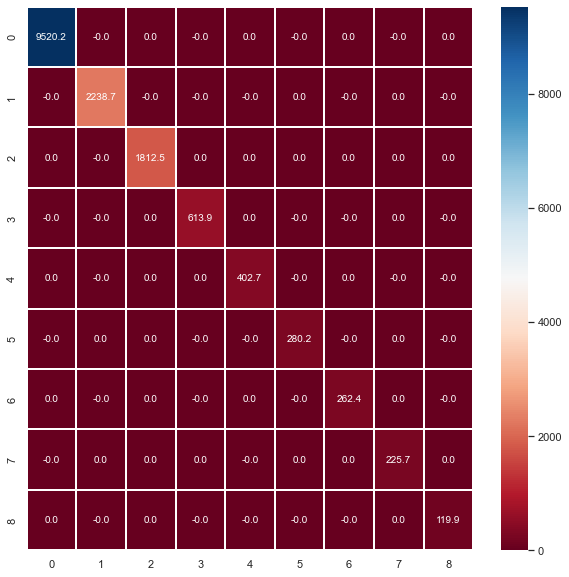

In [25]:
#sns.set(font_scale=1)
plt.subplots(figsize=(10, 10))
sns.heatmap(np.cov(data_PC.T), 
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

Сравним ковариационные матрицы датасетов до и после применения метода главных компонент:

* полученные компоненты обладают большим разбросом данных;
* корреляции между отдельными компонентами обратились в нуль.

In [371]:
# Проверка
from sklearn.decomposition import PCA
pca = PCA(n_components = PC_num)
XPCAreduced = pca.fit_transform(data)
XPCAreduced

array([[-36.40663719,  15.67797346,  11.51464419, ...,  13.34778818,
         -4.79544456,  -0.90872481],
       [ -4.78304164,  48.62090765, -11.54623737, ...,  13.92315038,
        -21.24086006,  -3.1939431 ],
       [-28.4229306 , -55.86809175,  54.09396298, ...,  10.08995889,
          7.44489391,   3.41570462],
       ...,
       [ 94.21653151,  -1.21993125,  16.73821377, ...,  -1.55332419,
         -8.51140258,   3.23967026],
       [-28.49303395,  94.08844689, -32.6254664 , ...,  14.80770238,
         22.30575764,   1.95789843],
       [ -8.05398445, -17.96194888, -23.59185368, ...,  14.54967908,
         15.71510795,  12.891271  ]])